In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
from scipy import signal

In [2]:
def Gaussian(x, y, sigma):
    return (1/(2*np.pi*(sigma**2))) * np.exp(-(x**2+y**2)/(2*sigma**2))

In [3]:
def Gaussian_kernel(h, w, sigma):
    kernel = np.empty((h, w))
    
    for i in range(h):
        for j in range(w):
            kernel[i, j] = Gaussian(i-h//2, j-w//2, sigma)
            
    return kernel

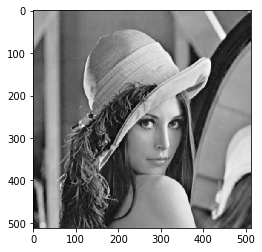

In [4]:
# 3-1
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
sigma = 1/(2*np.log(2))
kernel = Gaussian_kernel(3, 3, sigma)
result = signal.convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0).astype(np.uint8)

plt.imshow(result, cmap='gray')
plt.show()

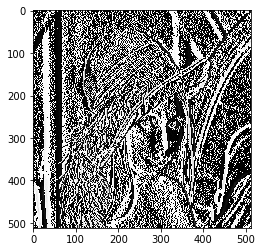

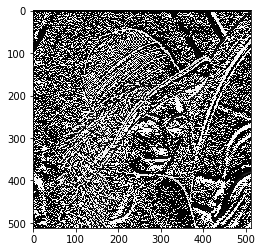

In [5]:
# 3-2
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
k_x, k_y = np.array([[-1,0,1]])/2, np.array([[-1],[0],[1]])/2
I_x = signal.convolve2d(img, k_x, mode='same', boundary='fill', fillvalue=0).astype(np.uint8)
I_y = signal.convolve2d(img, k_y, mode='same', boundary='fill', fillvalue=0).astype(np.uint8)

plt.imshow(I_x, cmap='gray')
plt.show()
plt.imshow(I_y, cmap='gray')
plt.show()

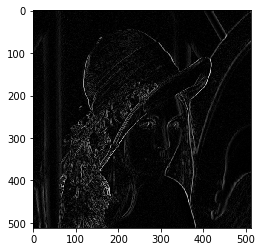

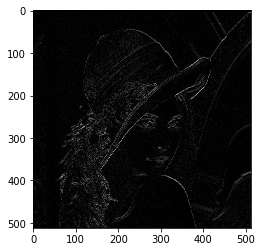

In [6]:
# 3-2'
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
k_x, k_y = np.array([[-1,0,1]])/2, np.array([[-1],[0],[1]])/2
I_x = np.absolute(signal.convolve2d(img, k_x, mode='same', boundary='fill', fillvalue=0)).astype(np.uint8)
I_y = np.absolute(signal.convolve2d(img, k_y, mode='same', boundary='fill', fillvalue=0)).astype(np.uint8)

plt.imshow(I_x, cmap='gray')
plt.show()
plt.imshow(I_y, cmap='gray')
plt.show()

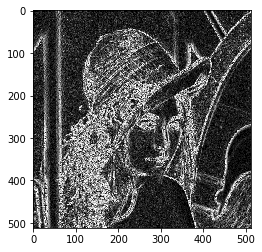

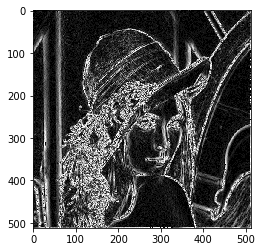

In [11]:
# 3-3
lena = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

sigma = 1/(2*np.log(2))
kernel = Gaussian_kernel(3, 3, sigma)
gaussian_lena = signal.convolve2d(lena, kernel, mode='same', boundary='fill', fillvalue=0).astype(np.uint8)

k_x, k_y = np.array([[-1,0,1]])/2, np.array([[-1],[0],[1]])/2

lena_I_x = signal.convolve2d(lena, k_x, mode='same', boundary='fill', fillvalue=0).astype(np.uint8)
lena_I_y = signal.convolve2d(lena, k_y, mode='same', boundary='fill', fillvalue=0).astype(np.uint8)
lena_gradient = np.sqrt(np.square(lena_I_x) + np.square(lena_I_y)).astype(np.uint8)
plt.imshow(lena_gradient, cmap='gray')
plt.show()

gaussian_lena_I_x = signal.convolve2d(gaussian_lena, k_x, mode='same', boundary='fill', fillvalue=0).astype(np.uint8)
gaussian_lena_I_y = signal.convolve2d(gaussian_lena, k_y, mode='same', boundary='fill', fillvalue=0).astype(np.uint8)
gaussian_lena_gradient = np.sqrt(np.square(gaussian_lena_I_x) + np.square(gaussian_lena_I_y)).astype(np.uint8)
plt.imshow(gaussian_lena_gradient, cmap='gray')
plt.show()


In [8]:
A = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
print(signal.convolve2d(A, kernel, mode='same', boundary='fill', fillvalue=0))

[[0.7464111  0.95294068 0.95294068 0.7464111 ]
 [1.49282219 1.90588136 1.90588136 1.49282219]
 [2.23923329 2.85882204 2.85882204 2.23923329]
 [2.1768009  2.7791148  2.7791148  2.1768009 ]]


In [9]:
A = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
B = np.array([[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]])
grad = signal.convolve2d(A, B, mode='same', boundary='fill', fillvalue=0)
print(grad)


[[0.6 0.9 0.9 0.6]
 [1.2 1.8 1.8 1.2]
 [1.8 2.7 2.7 1.8]
 [1.4 2.1 2.1 1.4]]


In [10]:
A = np.array([1,2])
print(np.square(A))

[1 4]
